In [68]:
import pandas as pd
import numpy as np
import sys, os
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import statsmodels.formula.api as smf
from sklearn.model_selection import KFold

In [2]:
attributes = ['air_temperature','clearsky_dhi','clearsky_dni','clearsky_ghi','cloud_type','coordinates','dew_point','dhi','dni','fill_flag'
 ,'ghi','meta','relative_humidity','solar_zenith_angle','surface_albedo','surface_pressure','time_index',
 'total_precipitable_water','wind_direction','wind_speed']
attributes = ','.join(attributes)

In [3]:
# Declare all variables as strings. Spaces must be replaced with '+', i.e., change 'John Smith' to 'John+Smith'.
# Define the lat, long of the location and the year
lat, lon, year = 36.210, -120.085, 2010
# You must request an NSRDB api key from the link above
api_key = 'VvROkeZZCwGSD5nJphV3QNsfDUEplzgwzPSw0Kj1'
# Set the attributes to extract (e.g., dhi, ghi, etc.), separated by commas.
attributes = 'relative_humidity,dew_point,surface_albedo,total_precipitable_water,surface_pressure,ghi,dhi,dni,wind_speed,air_temperature,solar_zenith_angle,relative_humidity,clearsky_ghi,clearsky_dni,clearsky_dhi,cloud_type'

# Choose year of data
year = '2010'
# Set leap year to true or false. True will return leap day data if present, false will not.
leap_year = 'false'
# Set time interval in minutes, i.e., '30' is half hour intervals. Valid intervals are 30 & 60.
interval = '30'
# Specify Coordinated Universal Time (UTC), 'true' will use UTC, 'false' will use the local time zone of the data.
# NOTE: In order to use the NSRDB data in SAM, you must specify UTC as 'false'. SAM requires the data to be in the
# local time zone.
utc = 'false'
# Your full name, use '+' instead of spaces.
your_name = 'Tamuz+Hod'
# Your reason for using the NSRDB.
reason_for_use = 'class+project'
# Your affiliation
your_affiliation = 'UCSD'
# Your email address
your_email = 'test@ucsd.edu'
# Please join our mailing list so we can keep you up-to-date on new developments.
mailing_list = 'true'

# Declare url string
url = 'http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes)
# Return just the first 2 lines to get metadata:
info = pd.read_csv(url, nrows=1)
# See metadata for specified properties, e.g., timezone and elevation
timezone, elevation = info['Local Time Zone'], info['Elevation']

In [4]:
# View metadata
info

,Source,Location ID,City,State,Country,Latitude,Longitude,Time Zone,Elevation,Local Time Zone,...,Cloud Type 11,Cloud Type 12,Fill Flag 0,Fill Flag 1,Fill Flag 2,Fill Flag 3,Fill Flag 4,Fill Flag 5,Surface Albedo Units,Version
0,NSRDB,105434,-,-,-,36.21,-120.1,-8,102,-8,...,Dust,Smoke,NaN,Missing Image,Low Irradiance,Exceeds Clearsky,Missing CLoud Properties,Rayleigh Violation,NaN,v3.0.1


In [5]:
# Return all but first 2 lines of csv to get data:
df_wether_2010 = pd.read_csv(url, skiprows=2)

# Set the time index in the pandas dataframe:
df_wether_2010 = df_wether_2010.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))



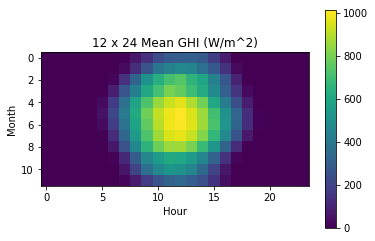

In [6]:
df = pd.DataFrame({'ghi': df_wether_2010['GHI']}, index=df_wether_2010.index)
df["year"] = df.index.year
df["month"] = df.index.month
df["day"] = df.index.day
df["hour"] = df.index.hour

agg = df.groupby(["month","hour"]).mean()
agg = agg.reset_index().pivot(index="month",columns="hour",values="ghi")

plt.imshow(agg)
plt.xlabel("Hour")
plt.ylabel("Month")
plt.title("12 x 24 Mean GHI (W/m^2)")
plt.colorbar()

In [7]:
df_weather = df_wether_2010

In [8]:
year = 2010

In [9]:
for i in range(6):
    year = str(int(year) + 1)
    url = 'http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes)
    df_temp = pd.read_csv(url, skiprows=2)
    df_temp = df_temp.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))
    df_weather = df_weather.append(df_temp)


In [10]:
df_weather.head()

,Year,Month,Day,Hour,Minute,Relative Humidity,Dew Point,Surface Albedo,Precipitable Water,Pressure,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Clearsky GHI,Clearsky DNI,Clearsky DHI,Cloud Type
2010-01-01 00:00:00,2010,1,1,0,0,71.47,3,0.148,1.683,1010.0,0,0,0,0.7,9,166.76,0,0,0,7
2010-01-01 00:30:00,2010,1,1,0,30,71.46,3,0.148,1.698,1010.0,0,0,0,0.6,9,165.63,0,0,0,7
2010-01-01 01:00:00,2010,1,1,1,0,71.20,3,0.148,1.713,1010.0,0,0,0,0.5,9,162.05,0,0,0,6
2010-01-01 01:30:00,2010,1,1,1,30,71.18,3,0.148,1.726,1010.0,0,0,0,0.5,9,157.17,0,0,0,8
2010-01-01 02:00:00,2010,1,1,2,0,70.73,3,0.148,1.739,1010.0,0,0,0,0.5,9,151.67,0,0,0,8


solar_cleaned = pd.read_pickle("./solar.pkl")
training_data = solar_cleaned.loc[solar_cleaned['ID'] == 'A-1611']
training_data = training_data.join(df_weather)
training_data_cleaned = training_data.dropna(thresh=5)
training_data_cleaned.to_pickle("./training_data.pkl")

In [15]:
training_data_cleaned["Cloud Type"].unique()

array([ 0.,  1.,  2.,  3.,  4.,  8.,  7.,  6.,  9., 10.])

In [24]:
for item in training_data_cleaned["Cloud Type"].unique():
    column_name = "Cloud Type " + str(int(item))
    training_data_cleaned[column_name] = training_data_cleaned["Cloud Type"] == int(item)

C:\Users\Stephen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
training_data_cleaned = training_data_cleaned*1

In [30]:
training_data_cleaned= training_data_cleaned.drop(columns = ["Cloud Type"])

In [89]:
training_data_cleaned = training_data_cleaned.rename(columns = {"Relative Humidity": "RelativeHumidity",'Dew Point':'DewPoint',
                            'Surface Albedo':'SurfaceAlbedo','Precipitable Water':'PrecipitableWater',
                            'Wind Speed': 'WindSpeed','Solar Zenith Angle':'SolarZenithAngle',
                            'Clearsky GHI': 'ClearskyGHI', 'Clearsky DNI':'ClearskyDNI',
                            'Cloud Type 0': 'CloudType0', 'Cloud Type 1':'CloudType1',
                            'Cloud Type 2':'CloudType2','Cloud Type 3':'CloudType3',
                            'Cloud Type 4':'CloudType4','Cloud Type 5':'CloudType5',
                            'Cloud Type 6':'CloudType6','Cloud Type 7':'CloudType7',
                            'Cloud Type 8':'CloudType8','Cloud Type 9':'CloudType9',
                            'Cloud Type 10':'CloudType10','Clearsky DHI':'ClearskyDHI',})

In [117]:
training_data_cleaned.isna().sum()

ID                    0
kWh                  78
Flag                  0
Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
RelativeHumidity      0
DewPoint              0
SurfaceAlbedo         0
PrecipitableWater     0
Pressure              0
GHI                   0
DHI                   0
DNI                   0
WindSpeed             0
Temperature           0
SolarZenithAngle      0
ClearskyGHI           0
ClearskyDNI           0
ClearskyDHI           0
CloudType0            0
CloudType1            0
CloudType2            0
CloudType3            0
CloudType4            0
CloudType8            0
CloudType7            0
CloudType6            0
CloudType9            0
CloudType10           0
dtype: int64

In [121]:
training_data_cleaned =training_data_cleaned.dropna()

In [122]:
training_data_cleaned.isna().sum()

ID                   0
kWh                  0
Flag                 0
Year                 0
Month                0
Day                  0
Hour                 0
Minute               0
RelativeHumidity     0
DewPoint             0
SurfaceAlbedo        0
PrecipitableWater    0
Pressure             0
GHI                  0
DHI                  0
DNI                  0
WindSpeed            0
Temperature          0
SolarZenithAngle     0
ClearskyGHI          0
ClearskyDNI          0
ClearskyDHI          0
CloudType0           0
CloudType1           0
CloudType2           0
CloudType3           0
CloudType4           0
CloudType8           0
CloudType7           0
CloudType6           0
CloudType9           0
CloudType10          0
dtype: int64

In [123]:
training_data_cleaned.to_pickle("./training_data.pkl")

In [139]:
def get_train_MSE(predictions):
    return ((df_train["kWh"]-predictions)**2)/len(predictions)

def get_test_MSE(predictions):
    return ((df_test["kWh"]-predictions)**2)/len(predictions)

In [154]:
k = 5 
kf = KFold(n_splits=k, shuffle=True)

joiner = ""
used = []
predictors = training_data_cleaned.columns
predictors = list(predictors)
predictors.remove('kWh')
predictors.remove('ID')
predictors.remove('Flag')

for i in range(0, len(predictors),1):
    mean_training_err = []
    mean_testing_err = []
    for item in predictors:
        train_trrs = []
        test_trrs = []
        
        if item not in joiner:
            for train_index, test_index in kf.split(training_data_cleaned):  #Run 5 models for 1 predictor
                df_train = training_data_cleaned.iloc[train_index, :]
                df_test = training_data_cleaned.iloc[test_index, :]

                formula = "kWh ~ 1 + " + joiner + item
                model = smf.ols(formula = formula, data = df_train).fit()

                train_trrs.append(get_train_MSE(model.predict(df_train))) 
                test_trrs.append(get_test_MSE(model.predict(df_test)))
               
            mean_training_err.append(np.mean(train_trrs))
            mean_testing_err.append(np.mean(test_trrs))
        
          #  print((mean_training_err[-1]), item, mean_testing_err[-1])
    choice = predictors[mean_training_err.index(min(mean_training_err))]
    joiner = joiner + choice + " + "
    test_of_choice = mean_testing_err[mean_training_err.index(min(mean_training_err))]
    used.append([joiner, test_of_choice])
    predictors.remove(choice)
    print(joiner)
    print(test_of_choice)

GHI + 
5.5340033537659156e-05
GHI + ClearskyGHI + 
5.189580842293265e-05
GHI + ClearskyGHI + Temperature + 
4.86947265840979e-05
GHI + ClearskyGHI + Temperature + DewPoint + 
4.817883504399822e-05
GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + 
4.6584222031887464e-05
GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + Year + 
4.624216091529716e-05
GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + Year + Pressure + 
4.614917573404919e-05
GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + Year + Pressure + Hour + 
4.607672022263453e-05
GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + Year + Pressure + Hour + Month + 
4.599829955397651e-05
GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + Year + Pressure + Hour + Month + PrecipitableWater + 
4.596150574897415e-05
GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + Year + Pressure + Hour + Month + PrecipitableWater + Day + 
4.5948233102425255e-

- GHI 
    5.5340033537659156e-05
- GHI + ClearskyGHI  
    5.189580842293265e-05
- GHI + ClearskyGHI + Temperature  
    4.86947265840979e-05
- GHI + ClearskyGHI + Temperature + DewPoint  
    4.817883504399822e-05
- GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity 
    4.6584222031887464e-05
- GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + Year 
    4.624216091529716e-05
- GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + Year + Pressure 
    4.614917573404919e-05
- GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + Year + Pressure + Hour  
    4.607672022263453e-05
- GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + Year + Pressure + Hour + Month 
    4.599829955397651e-05
- GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + Year + Pressure + Hour + Month + PrecipitableWater 
    4.596150574897415e-05
- GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + Year + Pressure + Hour + Month + PrecipitableWater + Day 
    4.5948233102425255e-05
- GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + Year + Pressure + Hour + Month + PrecipitableWater + Day + CloudType8  
    4.59348318405039e-05
- GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + Year + Pressure + Hour + Month + PrecipitableWater + Day + CloudType8 + CloudType2 
    4.5922623047898415e-05
- GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + Year + Pressure + Hour + Month + PrecipitableWater + Day + CloudType8 + CloudType2 + CloudType6 
    4.591785078065044e-05
- GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + Year + Pressure + Hour + Month + PrecipitableWater + Day + CloudType8 + CloudType2 + CloudType6 + CloudType7 
    4.5912976417577295e-05
- GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + Year + Pressure + Hour + Month + PrecipitableWater + Day + CloudType8 + CloudType2 + CloudType6 + CloudType7 + DNI 
    4.591035087517093e-05
- GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + Year + Pressure + Hour + Month + PrecipitableWater + Day + CloudType8 + CloudType2 + CloudType6 + CloudType7 + DNI + SurfaceAlbedo  
    4.589828150893729e-05
- GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + Year + Pressure + Hour + Month + PrecipitableWater + Day + CloudType8 + CloudType2 + CloudType6 + CloudType7 + DNI + SurfaceAlbedo + WindSpeed  
    4.5875926854098723e-05
- GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + Year + Pressure + Hour + Month + PrecipitableWater + Day + CloudType8 + CloudType2 + CloudType6 + CloudType7 + DNI + SurfaceAlbedo + WindSpeed + ClearskyDHI 
    4.589595679417285e-05
- GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + Year + Pressure + Hour + Month + PrecipitableWater + Day + CloudType8 + CloudType2 + CloudType6 + CloudType7 + DNI + SurfaceAlbedo + WindSpeed + ClearskyDHI + CloudType3  
    4.590120488060424e-05
- GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + Year + Pressure + Hour + Month + PrecipitableWater + Day + CloudType8 + CloudType2 + CloudType6 + CloudType7 + DNI + SurfaceAlbedo + WindSpeed + ClearskyDHI + CloudType3 + CloudType0  
    4.589312183775326e-05
- GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + Year + Pressure + Hour + Month + PrecipitableWater + Day + CloudType8 + CloudType2 + CloudType6 + CloudType7 + DNI + SurfaceAlbedo + WindSpeed + ClearskyDHI + CloudType3 + CloudType0 + CloudType4  
    4.588622284000819e-05
- GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + Year + Pressure + Hour + Month + PrecipitableWater + Day + CloudType8 + CloudType2 + CloudType6 + CloudType7 + DNI + SurfaceAlbedo + WindSpeed + ClearskyDHI + CloudType3 + CloudType0 + CloudType4 + SolarZenithAngle  
    4.589167975692747e-05
- GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + Year + Pressure + Hour + Month + PrecipitableWater + Day + CloudType8 + CloudType2 + CloudType6 + CloudType7 + DNI + SurfaceAlbedo + WindSpeed + ClearskyDHI + CloudType3 + CloudType0 + CloudType4 + SolarZenithAngle + CloudType1  
    4.588836388180727e-05
- GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + Year + Pressure + Hour + Month + PrecipitableWater + Day + CloudType8 + CloudType2 + CloudType6 + CloudType7 + DNI + SurfaceAlbedo + WindSpeed + ClearskyDHI + CloudType3 + CloudType0 + CloudType4 + SolarZenithAngle + CloudType1 + DHI  
    4.588904350575004e-05
- GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + Year + Pressure + Hour + Month + PrecipitableWater + Day + CloudType8 + CloudType2 + CloudType6 + CloudType7 + DNI + SurfaceAlbedo + WindSpeed + ClearskyDHI + CloudType3 + CloudType0 + CloudType4 + SolarZenithAngle + CloudType1 + DHI + ClearskyDNI  
    4.588416506966418e-05
- GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + Year + Pressure + Hour + Month + PrecipitableWater + Day + CloudType8 + CloudType2 + CloudType6 + CloudType7 + DNI + SurfaceAlbedo + WindSpeed + ClearskyDHI + CloudType3 + CloudType0 + CloudType4 + SolarZenithAngle + CloudType1 + DHI + ClearskyDNI + Minute  
    4.588778734581278e-05
- GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + Year + Pressure + Hour + Month + PrecipitableWater + Day + CloudType8 + CloudType2 + CloudType6 + CloudType7 + DNI + SurfaceAlbedo + WindSpeed + ClearskyDHI + CloudType3 + CloudType0 + CloudType4 + SolarZenithAngle + CloudType1 + DHI + ClearskyDNI + Minute + CloudType10  
    4.590455416160583e-05
- GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + Year + Pressure + Hour + Month + PrecipitableWater + Day + CloudType8 + CloudType2 + CloudType6 + CloudType7 + DNI + SurfaceAlbedo + WindSpeed + ClearskyDHI + CloudType3 + CloudType0 + CloudType4 + SolarZenithAngle + CloudType1 + DHI + ClearskyDNI + Minute + CloudType10 + CloudType9 
    4.589566044271975e-05



In [158]:
i = 0
test_mse = []
for item in used:
    test_mse.append(used[i][1])
    i = i + 1

In [167]:
## Lowest Test MSE
optimal_forward_model = used[test_mse.index(min(test_mse))]
optimal_forward_model

['GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + Year + Pressure + Hour + Month + PrecipitableWater + Day + CloudType8 + CloudType2 + CloudType6 + CloudType7 + DNI + SurfaceAlbedo + WindSpeed + ',
 4.5875926854098723e-05]

In [169]:
best_forward = smf.ols(formula = 'kWh ~ 1 + GHI + ClearskyGHI + Temperature + DewPoint + RelativeHumidity + Year + Pressure + Hour + Month + PrecipitableWater + Day + CloudType8 + CloudType2 + CloudType6 + CloudType7 + DNI + SurfaceAlbedo + WindSpeed', data = training_data_cleaned).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    kWh   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 2.510e+04
Date:                Mon, 25 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:17:30   Log-Likelihood:                -85802.
No. Observations:               66468   AIC:                         1.717e+05
Df Residuals:                   66439   BIC:                         1.719e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -66.8968      3.493    -19.154      0.000     -73.742     -60.051
GHI                   0.0072      0.000     55.091      0.000       0.007       0.007
ClearskyGHI           0.0027      0.000     21.360      0.000       0.002       0.003
Temperature          -0.0743      0.001    -60.710      0.000      -0.077      -0.072
DewPoint              0.0736      0.002     48.515      0.000       0.071       0.077
RelativeHumidity     -0.0182      0.000    -45.616      0.000      -0.019      -0.017
Year                  0.0336      0.002     17.849      0.000       0.030       0.037
Pressure              0.0084      0.001     10.930      0.000       0.007       0.010
Hour                 -0.0070      0.001    -13.045      0.000      -0.008      -0.006
Month                -0.0108      0.001    -10.232      0.000      -0.013      -0.009
PrecipitableWater    -0.0460      0.008     -5.650      0.000      -0.062      -0.030
Day                   0.0018      0.000      4.630      0.000       0.001       0.003
CloudType8           -6.6685      0.361    -18.478      0.000      -7.376      -5.961
CloudType2           -6.5855      0.359    -18.342      0.000      -7.289      -5.882
CloudType6           -6.8468      0.359    -19.060      0.000      -7.551      -6.143
CloudType7           -6.7787      0.357    -18.970      0.000      -7.479      -6.078
DNI                  -0.0003   6.52e-05     -3.959      0.000      -0.000      -0.000
SurfaceAlbedo        -1.7107      0.364     -4.695      0.000      -2.425      -0.997
WindSpeed             0.0129      0.003      3.967      0.000       0.007       0.019
ClearskyDHI           0.0007      0.000      2.707      0.007       0.000       0.001
CloudType3           -6.7146      0.359    -18.727      0.000      -7.417      -6.012
CloudType0           -6.7110      0.357    -18.810      0.000      -7.410      -6.012
CloudType4           -6.7389      0.359    -18.787      0.000      -7.442      -6.036
SolarZenithAngle     -0.0002      0.000     -0.699      0.485      -0.001       0.000
CloudType1           -6.7280      0.360    -18.691      0.000      -7.433      -6.022
DHI                  -0.0003      0.000     -2.081      0.037      -0.001    -1.6e-05
ClearskyDNI          8.8e-05   6.21e-05      1.418      0.156   -3.36e-05       0.000
Minute               -0.0001      0.000     -0.613      0.540      -0.001       0.000
CloudType10          -6.6244      0.872     -7.601      0.000      -8.333      -4.916
CloudType9           -6.5004      0.379    -17.149      0.000      -7.243      -5.757
==============================================================================
Omnibus:                    30076.884   Durbin-Watson:                   0.394
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           695802.214
Skew:   

In [138]:
training_data_cleaned.loc["2010-08-26 01:00:00"]

ID                   A-1611
kWh                   0.016
Flag                      M
Year                   2010
Month                     8
Day                      26
Hour                      1
Minute                    0
RelativeHumidity       34.8
DewPoint                  6
SurfaceAlbedo         0.191
PrecipitableWater     3.014
Pressure                990
GHI                       0
DHI                       0
DNI                       0
WindSpeed               2.4
Temperature              24
SolarZenithAngle     131.44
ClearskyGHI               0
ClearskyDNI               0
ClearskyDHI               0
CloudType0                1
CloudType1                0
CloudType2                0
CloudType3                0
CloudType4                0
CloudType8                0
CloudType7                0
CloudType6                0
CloudType9                0
CloudType10               0
Name: 2010-08-26 01:00:00, dtype: object